# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

In [2]:
df_data = pd.read_csv('tenders.csv',index_col=0)

In [5]:
#pd.set_option("display.max_columns",None)
df_data.head()

,referenceNumber,tenderName,tenderNumber,branchId,branchName,agencyName,tenderStatusId,tenderTypeId,tenderTypeName,condetionalBookletPrice,lastEnqueriesDate,lastOfferPresentationDate,offersOpeningDate,lastEnqueriesDateHijri,offersOpeningDateHijri,lastOfferPresentationDateHijri,tenderActivityName,tenderActivityId,submitionDate,financialFees,invitationCost,buyingCost,hasInvitations,currentDate
tenderId,,,,,,,,,,,,,,,,,,,,,,,,
533707,230139871453,تأمين نظام املائي طبي متقدم بمستشفى الملك فهد ...,208,0,مستشفى الملك فهد العام,أدارة الموارد الذاتية بصحة جدة,4,1,منافسة عامة,0,2023-02-06T00:00:00,2023-02-07T11:00:00,2023-02-07T11:00:00,1444-07-15,1444-07-16,1444-07-16,تقنية المعلومات,902,2023-01-17T22:43:37.1658901,500,200,500,0,2023-01-17T00:00:00+03:00
533332,230139870923,منافسة توريد وتركيب وتشغيل كاميرات المراقبة وا...,2023/1,0,إدارة العقود والمشتريات,مستشفى وادي الدواسر,4,1,منافسة عامة,500,2023-02-05T00:00:00,2023-02-06T08:00:00,2023-02-06T08:00:00,1444-07-14,1444-07-15,1444-07-15,تجارة الأدوات والآلات والأجهزة,108,2023-01-17T22:20:50.2883129,500,200,500,0,2023-01-17T00:00:00+03:00
530602,230139866861,ارفف معدنية سلاستيل 22 رف مقاس 220*100*60 سم,4401040,0,إدارة العقود والمشتريات - الشراء المباشر مخزني...,مستشفى قاعدة الملك عبدالعزيز الجوية بالظهران,4,2,شراء مباشر,0,2023-01-22T00:00:00,2023-01-22T15:00:00,NaN,1444-06-29,NaN,1444-06-29,الأنشطة الطبية,1101,2023-01-17T21:13:07.4101704,0,200,0,0,2023-01-17T00:00:00+03:00
508161,221139831977,قطع غيار لجهاز طبي كما هو مرفق,4400782,0,إدارة العقود والمشتريات - الشراء المباشر مخزني...,مستشفى قاعدة الملك عبدالعزيز الجوية بالظهران,4,2,شراء مباشر,0,2023-01-22T00:00:00,2023-01-22T15:00:00,NaN,1444-06-29,NaN,1444-06-29,الأنشطة الطبية,1101,2023-01-17T21:12:12.4249526,0,200,0,0,2023-01-17T00:00:00+03:00
531706,230139868838,سائل مبيض كلوروكس 3.78 لتر Clorox : Bleach Wit...,4401106,0,إدارة العقود والمشتريات - الشراء المباشر مخزني...,مستشفى قاعدة الملك عبدالعزيز الجوية بالظهران,4,2,شراء مباشر,0,2023-01-29T00:00:00,2023-01-29T15:00:00,NaN,1444-07-07,NaN,1444-07-07,تجارة الأواني والأدوات المنزلية,107,2023-01-17T21:10:43.9585934,0,200,0,0,2023-01-17T00:00:00+03:00


In [6]:
def data_profile(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0],
                      df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 
                                            'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Percentage of missing values', ascending=True)
    return stats_df

In [7]:
data_profile(df_data)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,referenceNumber,182870,0.000000,0.000547,int64
1,tenderName,163092,0.000000,0.136162,object
2,tenderNumber,124107,12.079073,12.079073,object
3,branchId,1,0.000000,100.000000,int64
4,branchName,1093,0.000000,5.152841,object
5,agencyName,622,0.000000,11.592935,object
6,tenderStatusId,39,0.000000,50.592771,int64
7,tenderTypeId,7,0.000000,67.135123,int64
8,tenderTypeName,7,0.000000,67.135123,object
9,condetionalBookletPrice,148,0.000000,71.339750,int64


In [8]:
df_data.shape

(182870, 24)

# Data cleaning

In [9]:
df_data = df_data.drop(columns=['tenderNumber','offersOpeningDate','offersOpeningDateHijri','lastOfferPresentationDateHijri','lastEnqueriesDateHijri','branchId','currentDate'])

In [15]:
data_profile(df_data)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,referenceNumber,182870,0.0,0.000547,int64
1,tenderName,163092,0.0,0.136162,object
2,branchName,1093,0.0,5.152841,object
3,agencyName,622,0.0,11.592935,object
4,tenderStatusId,39,0.0,50.592771,int64
5,tenderTypeId,7,0.0,67.135123,int64
6,tenderTypeName,7,0.0,67.135123,object
7,condetionalBookletPrice,148,0.0,71.339750,int64
8,lastEnqueriesDate,1175,0.0,0.317165,object
9,lastOfferPresentationDate,38793,0.0,0.059058,datetime64[ns]


# Feature Engineering

In [12]:
df_data["submitionDate"] = pd.to_datetime(df_data["submitionDate"])

In [14]:
df_data["lastOfferPresentationDate"] = pd.to_datetime(df_data["lastOfferPresentationDate"])

In [30]:
df_data.head(1)

,referenceNumber,tenderName,branchName,agencyName,tenderStatusId,tenderTypeId,tenderTypeName,condetionalBookletPrice,lastEnqueriesDate,lastOfferPresentationDate,tenderActivityName,tenderActivityId,submitionDate,financialFees,invitationCost,buyingCost,hasInvitations,submitionDuration,submitionQuarter,submitionHour
tenderId,,,,,,,,,,,,,,,,,,,,
533707,230139871453,تأمين نظام املائي طبي متقدم بمستشفى الملك فهد ...,مستشفى الملك فهد العام,أدارة الموارد الذاتية بصحة جدة,4,1,منافسة عامة,0,2023-02-06T00:00:00,2023-02-07 11:00:00,تقنية المعلومات,902,2023-01-17 22:43:37.165890100,500,200,500,0,21 days,2023,22


### ايجاد المدة المستغرقة للتسليم بعد الانتهاء من العرض النهائي

In [20]:
df_data['submitionDuration'] = df_data["lastOfferPresentationDate"].dt.normalize() - df_data["submitionDate"].dt.normalize()

In [22]:
df_data['submitionQuarter'] = df_data["submitionDate"].dt.quarter

In [24]:
df_data['submitionQuarter'] = df_data["submitionDate"].dt.year

### ايجاد الساعات التي تم التسليم فيها

In [27]:
df_data['submitionHour'] = df_data["submitionDate"].dt.time

In [29]:
df_data['submitionHour'] = df_data['submitionHour'].astype(str).str[0:2]

In [31]:
df_data['submitionHour'] = df_data['submitionHour'].astype(int)

### ماهي اكثر ساعات العمل تسليما

In [32]:
df_data['Count'] = 1
hours = [hours for hours, df in df_data.groupby(['submitionHour'])]

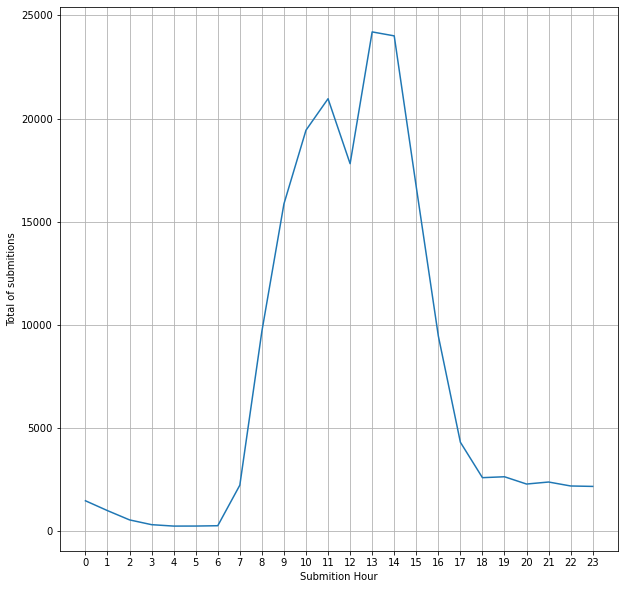

In [35]:
plt.figure(figsize=(10,10))
plt.plot(hours,df_data.groupby(['submitionHour']).count()['Count'])
plt.xticks(hours)
plt.ylabel('Total of submitions')
plt.xlabel("Submition Hour")
plt.grid()
plt.show()

### وش هي اكثر الايام التي تم التسليم فيها؟ 

In [38]:
df_data['submitionDay'] = df_data["submitionDate"].dt.day_name()

In [39]:
df_data.head(1)

,referenceNumber,tenderName,branchName,agencyName,tenderStatusId,tenderTypeId,tenderTypeName,condetionalBookletPrice,lastEnqueriesDate,lastOfferPresentationDate,tenderActivityName,tenderActivityId,submitionDate,financialFees,invitationCost,buyingCost,hasInvitations,submitionDuration,submitionQuarter,submitionHour,Count,submitionDay
tenderId,,,,,,,,,,,,,,,,,,,,,,
533707,230139871453,تأمين نظام املائي طبي متقدم بمستشفى الملك فهد ...,مستشفى الملك فهد العام,أدارة الموارد الذاتية بصحة جدة,4,1,منافسة عامة,0,2023-02-06T00:00:00,2023-02-07 11:00:00,تقنية المعلومات,902,2023-01-17 22:43:37.165890100,500,200,500,0,21 days,2023,22,1,Tuesday


In [41]:
days = [days for days, df in df_data.groupby(['submitionDay'])]

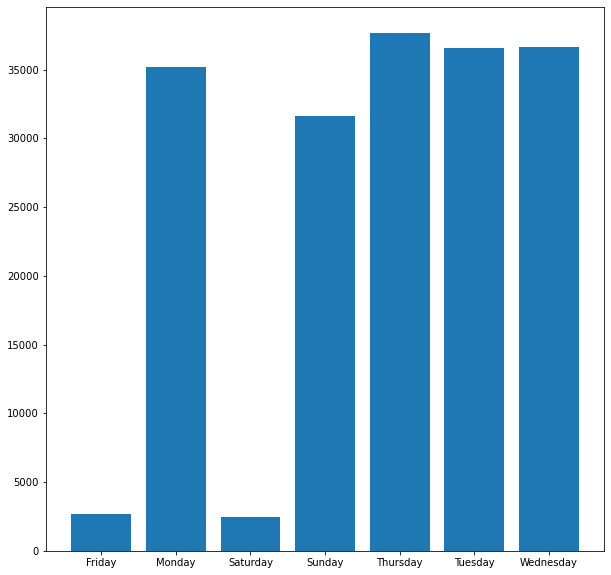

In [44]:
plt.figure(figsize=(10,10))
plt.bar(days,df_data.groupby('submitionDay').sum()['Count'])

plt.show()